In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

# Load the Excel file
xl = pd.ExcelFile('/Users/abc/Desktop/Bike Sales Dashboard.xlsx')

# Parse the last sheet
df = xl.parse(xl.sheet_names[-1])

# Display the first 10 rows
print(df.head(10))


      ID Martial Status  Gender  Income  Children            Education  \
0  12496        Married  Female   40000         1            Bachelors   
1  24107        Married    Male   30000         3      Partial College   
2  14177        Married    Male   80000         5      Partial College   
3  24381         Single    Male   70000         0            Bachelors   
4  25597         Single    Male   30000         0            Bachelors   
5  13507        Married  Female   10000         2      Partial College   
6  27974         Single    Male  160000         2          High School   
7  19364        Married    Male   40000         1            Bachelors   
8  22155        Married    Male   20000         2  Partial High School   
9  19280        Married    Male  120000         2      Partial College   

       Occupation Home Owner  Cars Commute Distance   Region  Age  \
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42   
1        Clerical        Yes     1        0-1 M

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Martial Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Age Brackets      1000 non-null   object
 13  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(9)
memory usage: 109.5+ KB


In [7]:
df.shape

(1000, 14)

In [8]:
df.isna().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [9]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [10]:
df = df.drop(columns='ID')

In [11]:
cat_col = ['Martial Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Age Brackets', 'Purchased Bike']
num_col = ['Income', 'Children', 'Cars', 'Age']

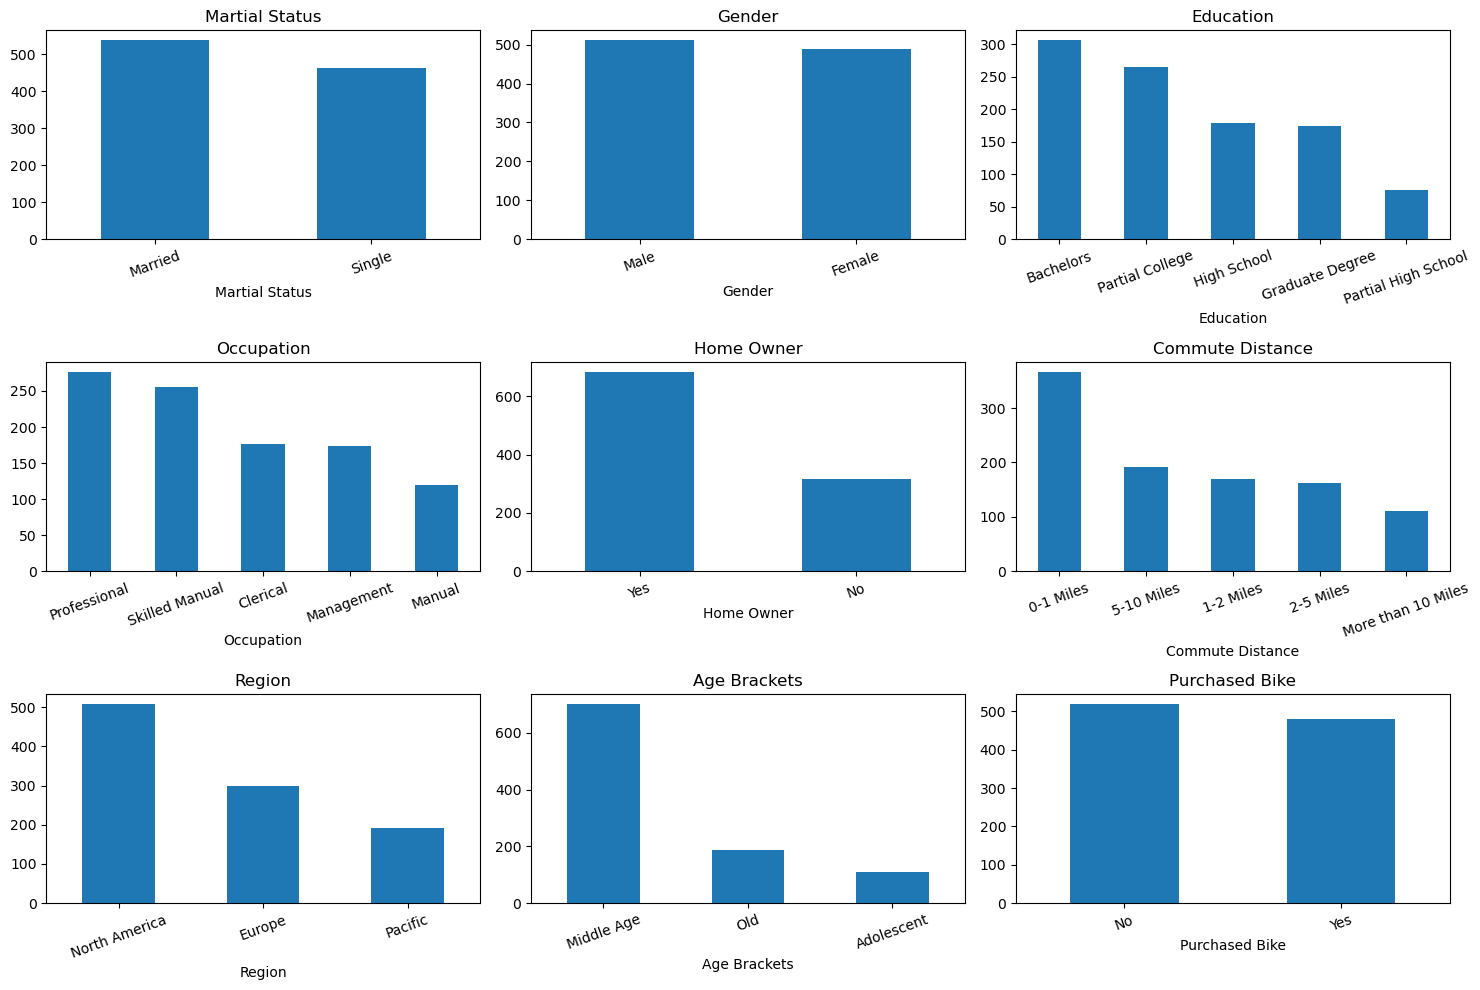

In [13]:
num_cols = len(cat_col)
fig, axes = plt.subplots(nrows=3, ncols=(num_cols + 2) // 3, figsize=(15, 10))

for ax, col in zip(axes.flatten(), cat_col):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

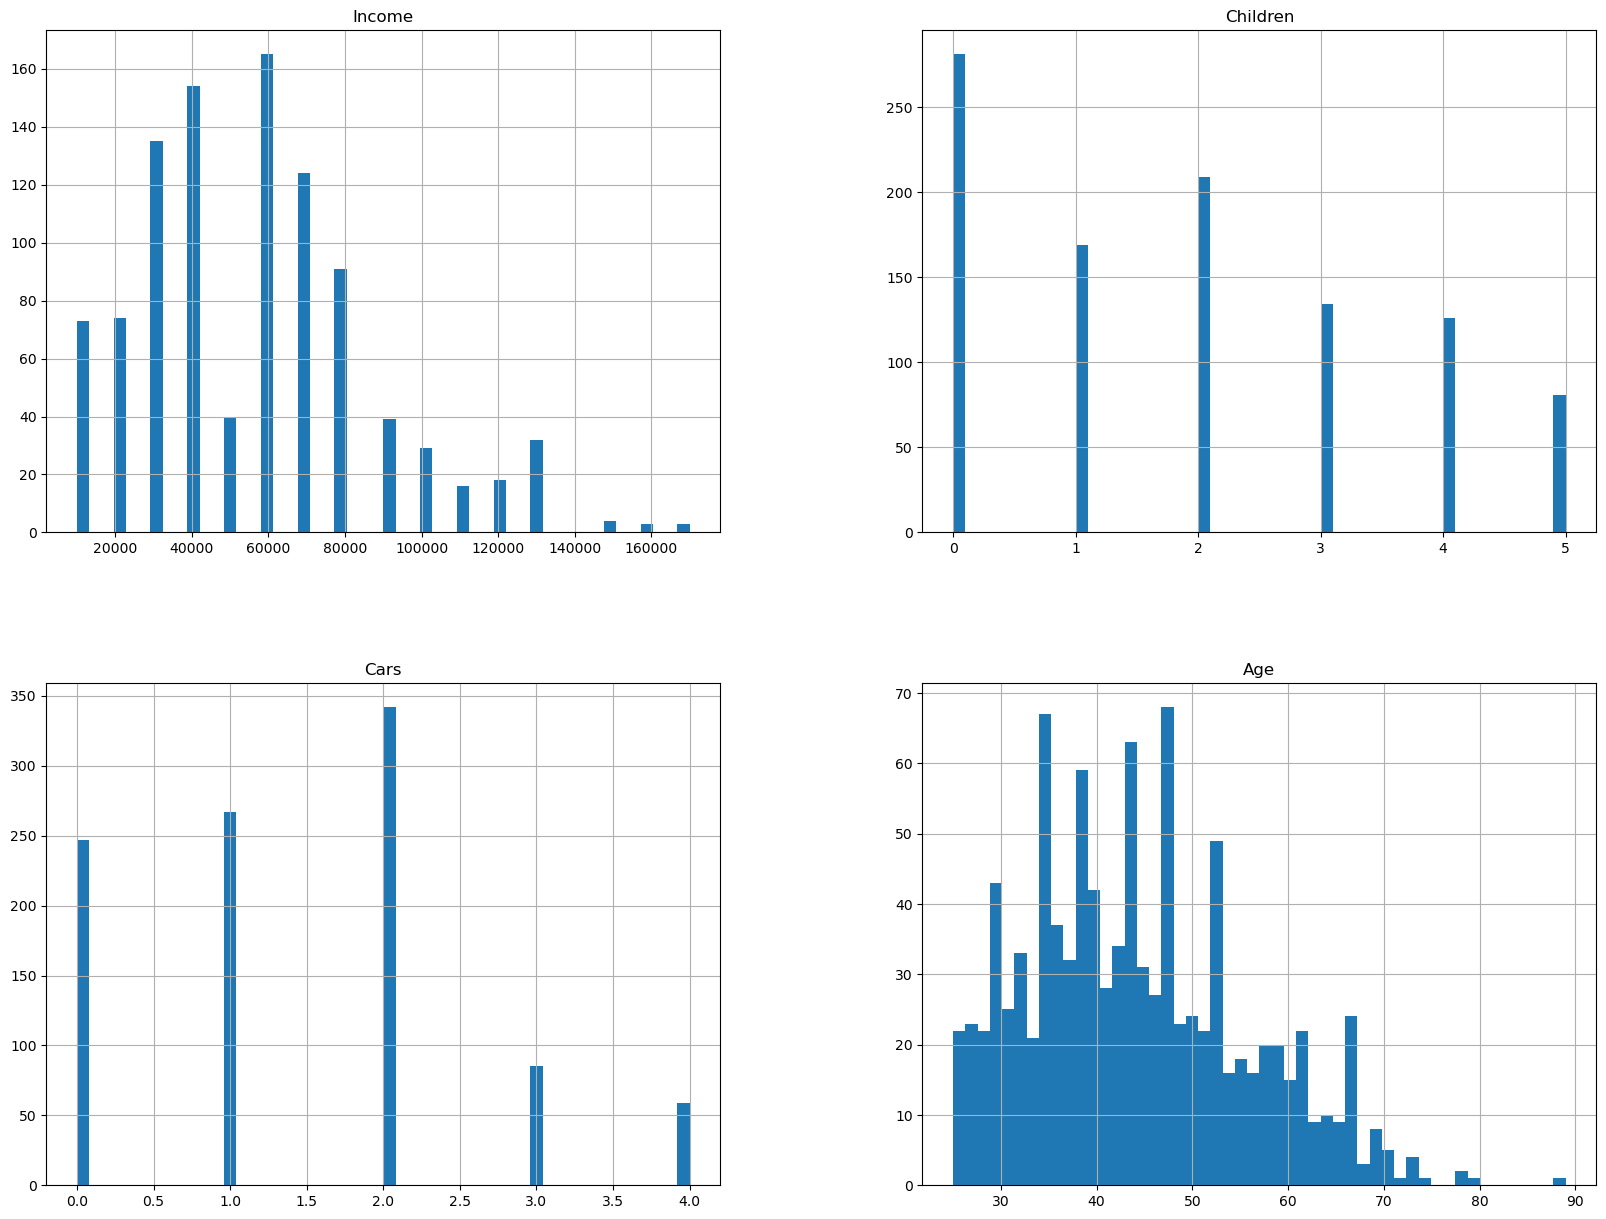

In [14]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution')

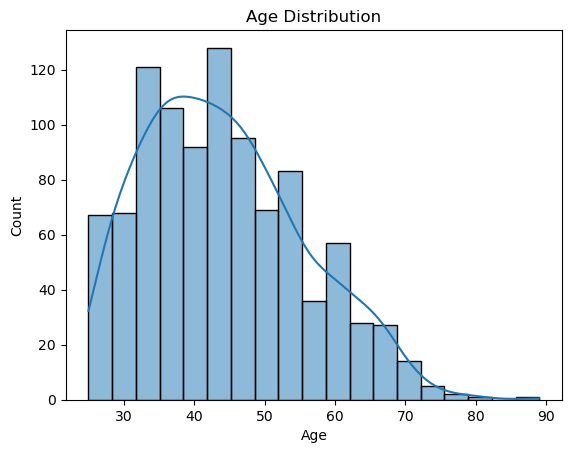

In [15]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Income Distribution')

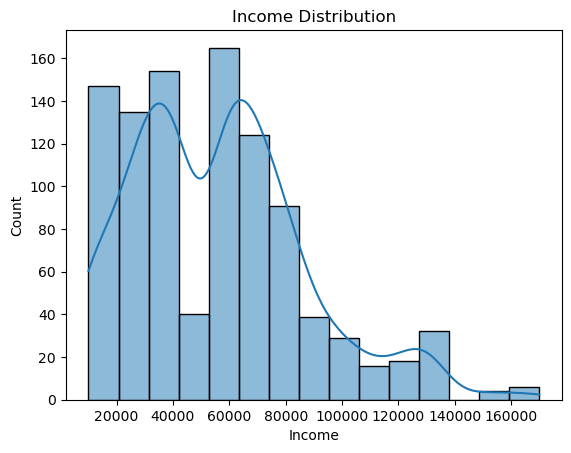

In [16]:
sns.histplot(df['Income'], kde=True, bins=15)
plt.title('Income Distribution')

<Axes: xlabel='Gender'>

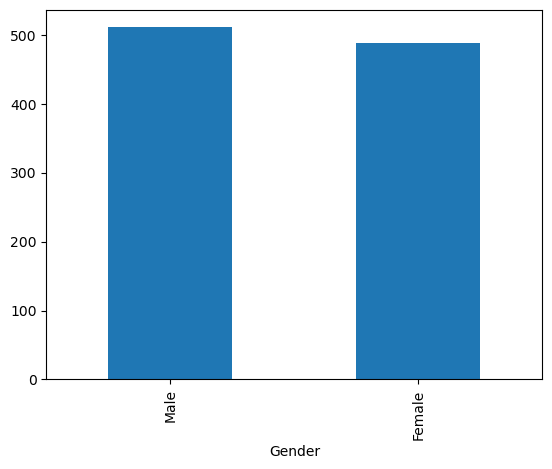

In [17]:
gender_count = df['Gender'].value_counts()
gender_count.plot(kind='bar')

<Axes: xlabel='Children', ylabel='count'>

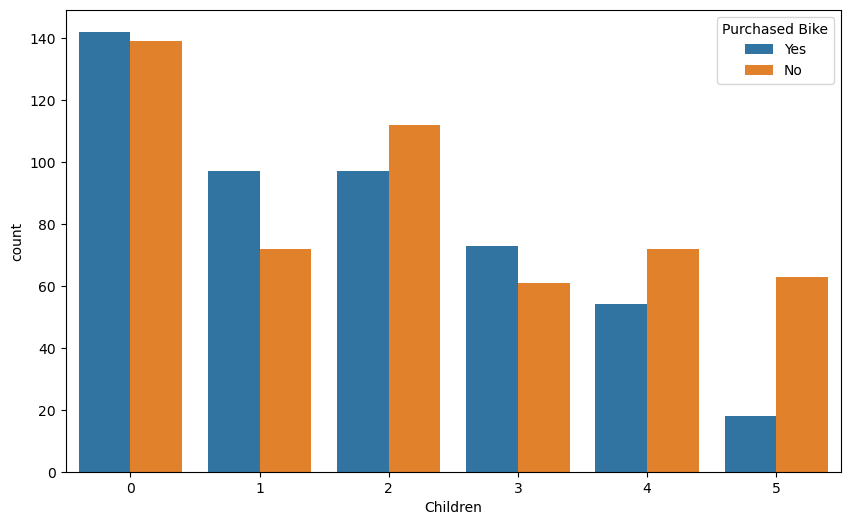

In [18]:
plt.figure(figsize=(10, 6))
df_plot = df[['Children', 'Purchased Bike']].groupby('Children').value_counts().reset_index()
sns.barplot(data=df_plot, x='Children', y='count', hue='Purchased Bike')

<Axes: xlabel='Education', ylabel='count'>

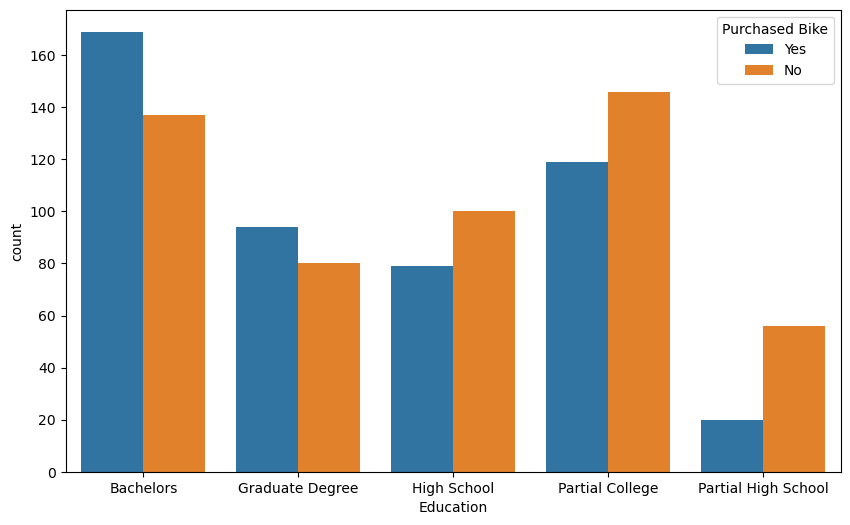

In [19]:
plt.figure(figsize=(10, 6))
df_plot = df[['Education', 'Purchased Bike']].groupby('Education').value_counts().reset_index()
sns.barplot(data=df_plot, x='Education', y='count', hue='Purchased Bike')

People with Bachelors and Partial College most likely to have a bike and People with Partial High School likely to didn't own a bike

<Axes: xlabel='Gender'>

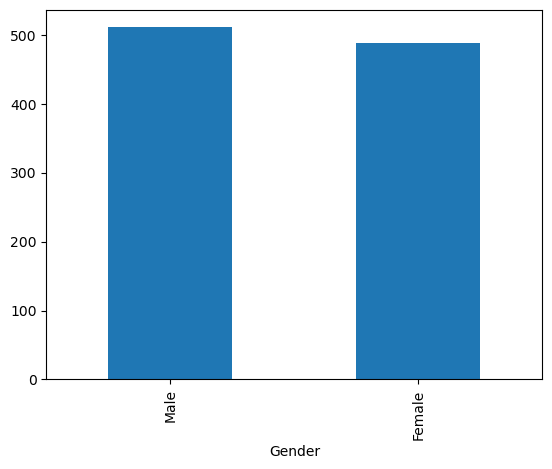

In [20]:
gender_count = df['Gender'].value_counts()
gender_count.plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

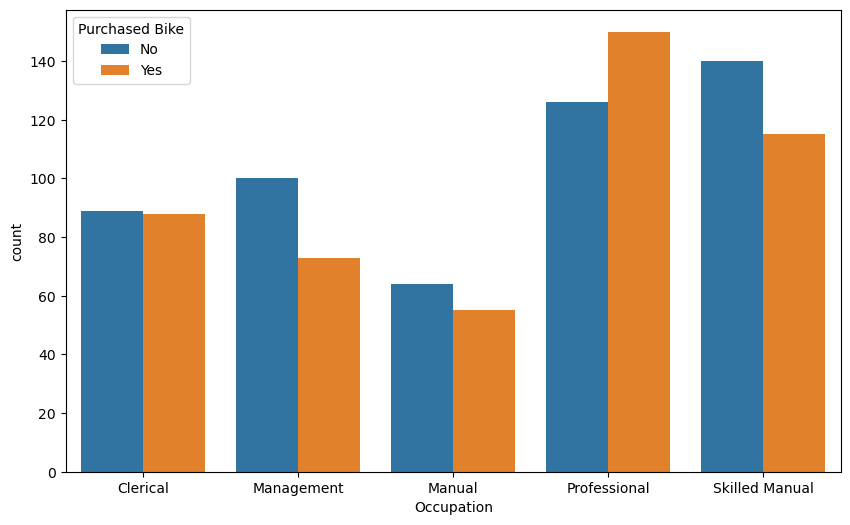

In [21]:
plt.figure(figsize=(10, 6))
df_plot = df[['Occupation', 'Purchased Bike']].groupby('Occupation').value_counts().reset_index()
sns.barplot(data=df_plot, x='Occupation', y='count', hue='Purchased Bike')

People with Professional occupation have higher probability to purchasing

<Axes: xlabel='Age Brackets', ylabel='count'>

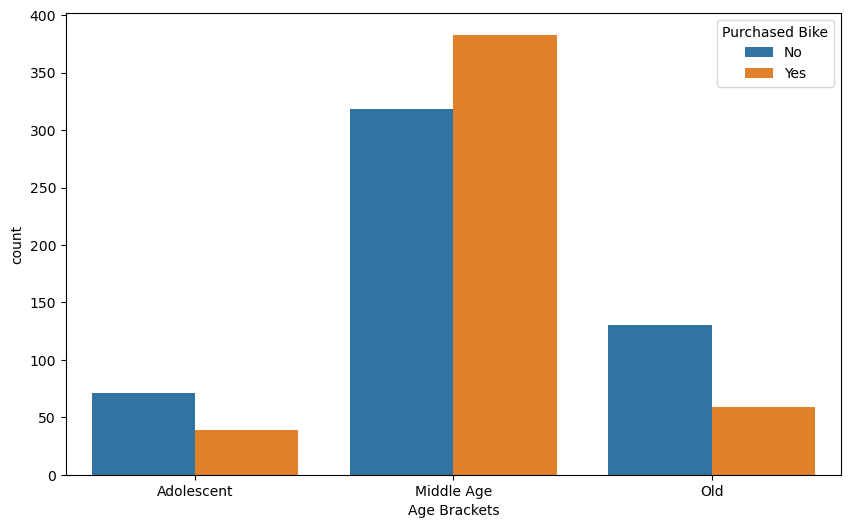

In [22]:
plt.figure(figsize=(10, 6))
df_plot = df[['Age Brackets', 'Purchased Bike']].groupby('Age Brackets').value_counts().reset_index()
sns.barplot(data=df_plot, x='Age Brackets', y='count', hue='Purchased Bike')

<Axes: xlabel='Commute Distance', ylabel='count'>

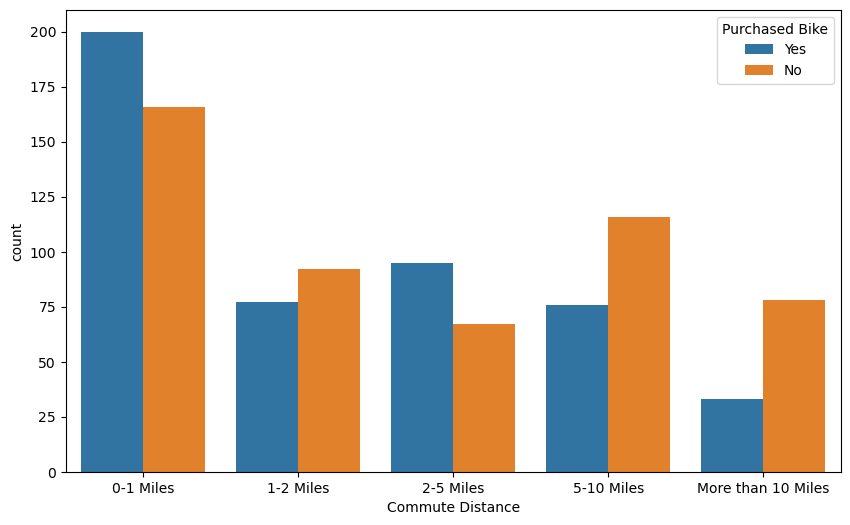

In [23]:
plt.figure(figsize=(10, 6))
df_plot = df[['Commute Distance', 'Purchased Bike']].groupby('Commute Distance').value_counts().reset_index()
sns.barplot(data=df_plot, x='Commute Distance', y='count', hue='Purchased Bike')

<Axes: xlabel='Region', ylabel='count'>

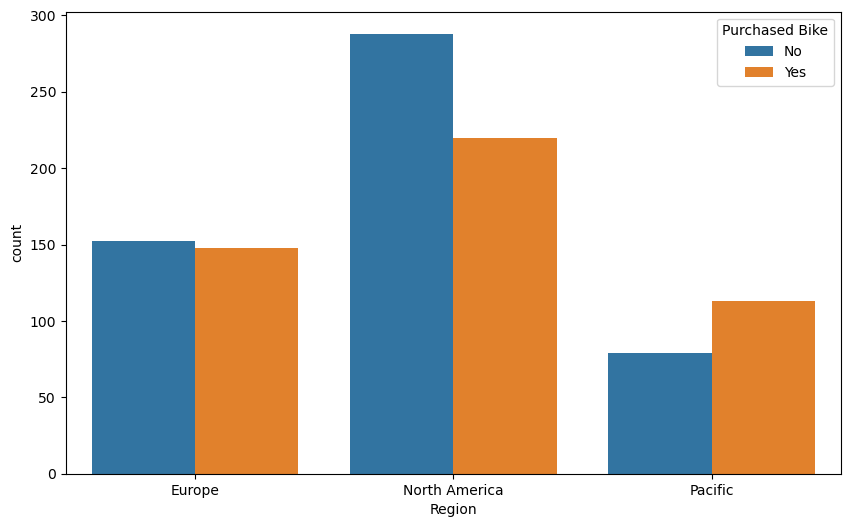

In [24]:
plt.figure(figsize=(10, 6))
df_plot = df[['Region', 'Purchased Bike']].groupby('Region').value_counts().reset_index()
sns.barplot(data=df_plot, x='Region', y='count', hue='Purchased Bike')

<Axes: xlabel='Home Owner', ylabel='count'>

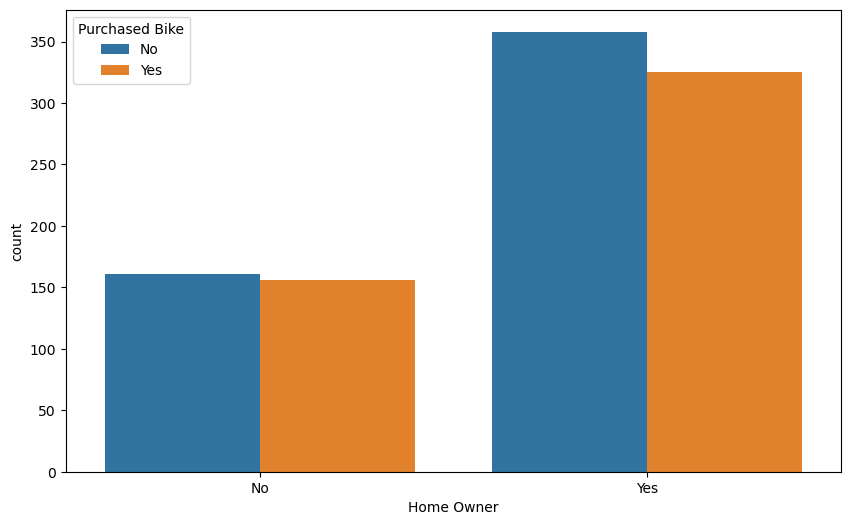

In [25]:
plt.figure(figsize=(10, 6))
df_plot = df[['Home Owner', 'Purchased Bike']].groupby('Home Owner').value_counts().reset_index()
sns.barplot(data=df_plot, x='Home Owner', y='count', hue='Purchased Bike')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

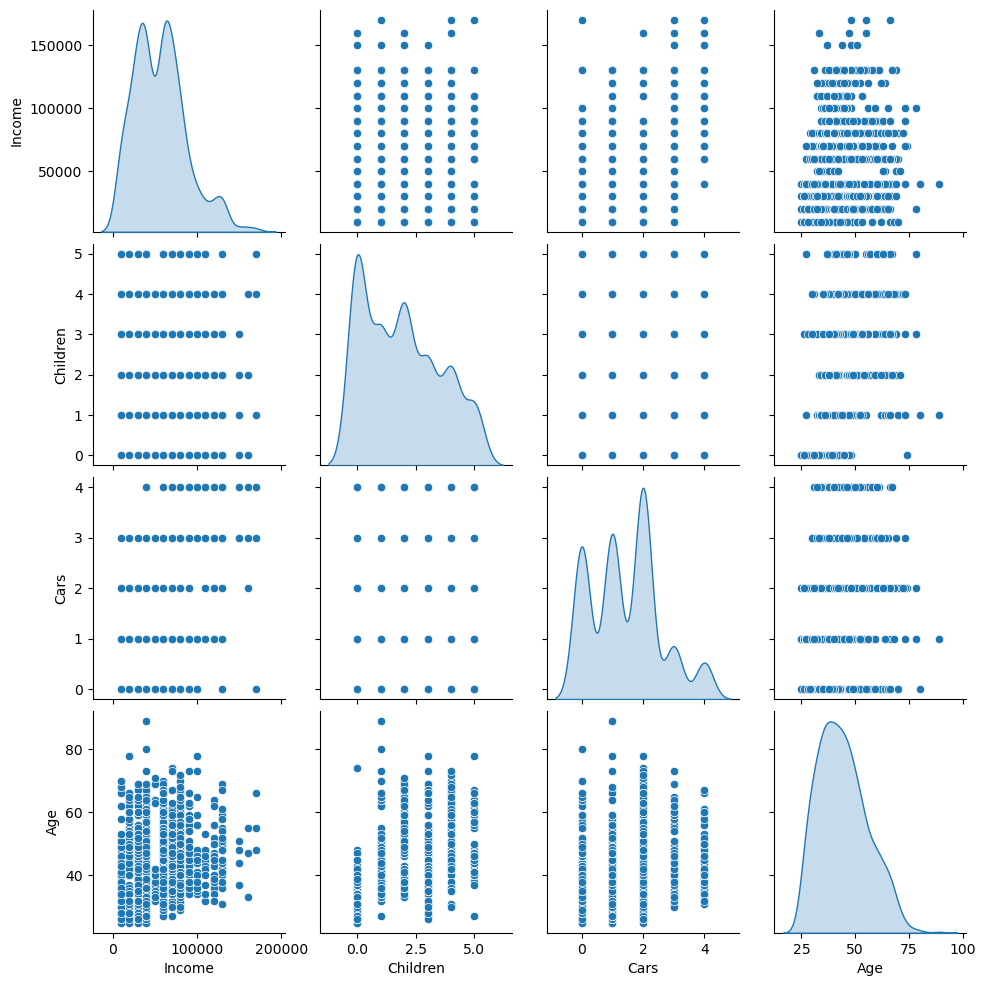

In [26]:
sns.pairplot(df, diag_kind='kde')

Text(0.5, 1.0, 'Confusion Matrix for Numerical Features')

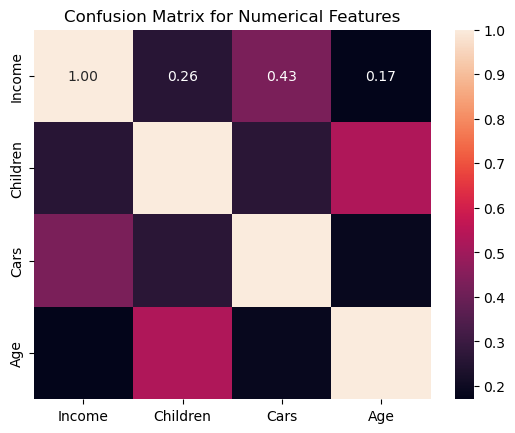

In [27]:
corr = df[num_col].corr()
sns.heatmap(corr, fmt='.2f', annot=True)
plt.title('Confusion Matrix for Numerical Features')

In [28]:
encoder = LabelEncoder()
df_org = df.copy()
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])
    
df.head(10)

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,0,0,40000,1,0,4,1,0,0,0,42,1,0
1,0,1,30000,3,3,0,1,1,0,0,43,1,0
2,0,1,80000,5,3,3,0,2,2,0,60,2,0
3,1,1,70000,0,0,3,1,1,3,2,41,1,1
4,1,1,30000,0,0,0,0,0,0,0,36,1,1
5,0,0,10000,2,3,2,1,0,1,0,50,1,0
6,1,1,160000,2,2,1,1,4,0,2,33,1,1
7,0,1,40000,1,0,4,1,0,0,0,43,1,1
8,0,1,20000,2,4,0,1,2,3,2,58,2,0
9,0,1,120000,2,3,2,1,1,0,0,40,1,1


In [29]:
X = df.drop(columns='Purchased Bike')
y = df['Purchased Bike']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#define model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(f"accuracy: {accuracy_score(y_pred, y_test) * 100 }%")
print(classification_report(y_pred, y_test))

accuracy: 72.5%
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       111
           1       0.68      0.72      0.70        89

    accuracy                           0.73       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72      0.73       200



Text(50.722222222222214, 0.5, 'True')

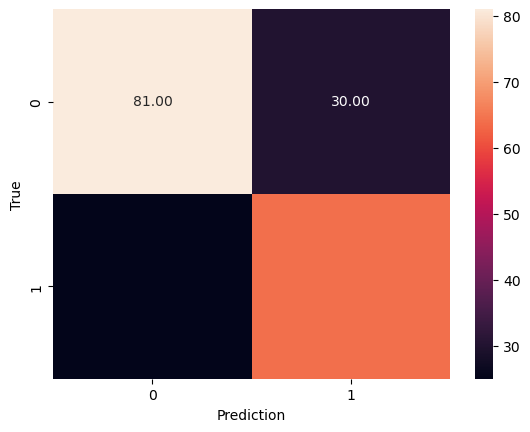

In [32]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, fmt='.2f', annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')